Epoch 1/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3094 - loss: 2.5291 - val_accuracy: 0.2128 - val_loss: 2.5903
Epoch 2/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2807 - loss: 1.9248 - val_accuracy: 0.2199 - val_loss: 1.8417
Epoch 3/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2976 - loss: 1.3645 - val_accuracy: 0.2695 - val_loss: 1.3842
Epoch 4/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4365 - loss: 0.9829 - val_accuracy: 0.4043 - val_loss: 1.1426
Epoch 5/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5176 - loss: 0.8678 - val_accuracy: 0.5106 - val_loss: 0.9968
Epoch 6/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5230 - loss: 0.7801 - val_accuracy: 0.5035 - val_loss: 0.8937
Epoch 7/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5229 - loss: 0.7290 - val_accuracy: 0.5106 - val_loss: 0.7931
Epoch 8/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5138 - loss: 0.6755 - val_accuracy: 0.5248

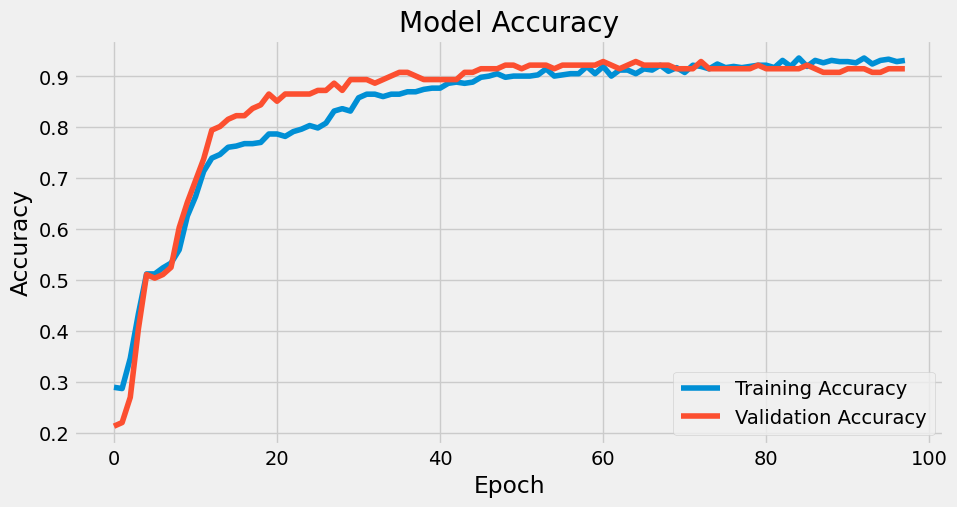

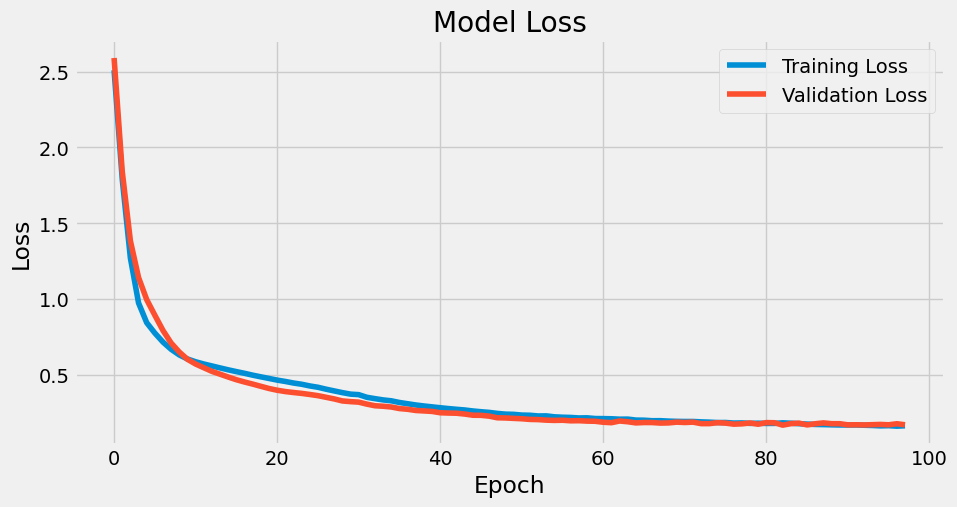

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Confusion Matrix = 
 [[100   5]
 [  6  30]]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9310 - loss: 0.1690 
Test Loss: 0.18
Test Accuracy: 0.92


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model #for model visualization

from warnings import filterwarnings
filterwarnings('ignore')


df = pd.read_csv('autism_screening.csv')
#fill the missing values with the mean value of that column rounded to the nearest whole number
df['age'] = df['age'].fillna(round(df['age'].mean()))
df['age'].isnull().sum()
df['relation'] = df['relation'].replace('?', 'Others')

df = df.drop('age_desc', axis=1)
X = df.drop('Class/ASD', axis=1)
y = df['Class/ASD']
# Columns to apply label encoding
cols_to_encode = ['gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']

# Apply label encoding to X
label_encoder_X = LabelEncoder()
for col in cols_to_encode:
    X[col] = label_encoder_X.fit_transform(X[col])

# Apply label encoding to y
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
        # Dense(10, activation='relu', input_dim=19),
        Dense(10, activation='relu', input_dim=X_train.shape[1]),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
])
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=150, validation_split=0.25, callbacks=[early_stopping])

# Assuming 'history' is the variable storing the training history
# Get training and validation accuracy and loss
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create the accuracy graph
plt.figure(figsize=(10, 5))  # Adjust figure size if needed
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Create the loss graph
plt.figure(figsize=(10, 5))  # Adjust figure size if needed
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix = \n",cm)
print()
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.2f}\nTest Accuracy: {accuracy:.2f}")